<a href="https://colab.research.google.com/github/sanjibsinha/Machine-Learning-Primer/blob/main/Classifying_Images_with_Deep_Learnin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import TensorFlow and the Keras API
import tensorflow as tf
from tensorflow import keras

# Import numpy for numerical operations
import numpy as np

# Import matplotlib for visualizing our data
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset from Keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Let's look at the shape of our data
print(f"Training data shape: {X_train.shape}")
# Output: Training data shape: (60000, 28, 28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)


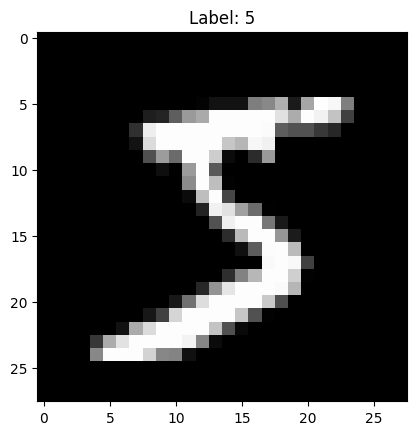

In [3]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to include a channel dimension (1 for grayscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Let's visualize one of the images to see what we're working with
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [4]:
# Define the model architecture
model = keras.Sequential([
    # First Convolutional Layer
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # Flatten the image data to feed into the final layers
    keras.layers.Flatten(),

    # A standard fully connected layer
    keras.layers.Dense(64, activation='relu'),

    # The output layer with 10 neurons (one for each digit 0-9)
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on our training data
# We'll train for 5 epochs, meaning the model will see the entire dataset 5 times.
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.8949 - loss: 0.3468 - val_accuracy: 0.9817 - val_loss: 0.0584
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9837 - loss: 0.0533 - val_accuracy: 0.9888 - val_loss: 0.0395
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9891 - loss: 0.0337 - val_accuracy: 0.9875 - val_loss: 0.0400
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9920 - loss: 0.0235 - val_accuracy: 0.9888 - val_loss: 0.0336
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9947 - loss: 0.0164 - val_accuracy: 0.9908 - val_loss: 0.0333


In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'\\nTest accuracy: {test_acc*100:.2f}%')

313/313 - 4s - 11ms/step - accuracy: 0.9904 - loss: 0.0339
\nTest accuracy: 99.04%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


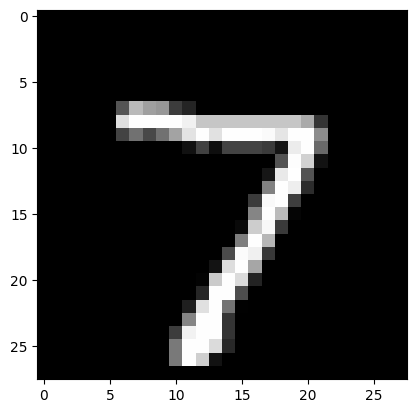

Model prediction: 7
Actual digit: 7


In [7]:
# Make predictions on the entire test set
predictions = model.predict(X_test)

# Let's look at the first image in the test set
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.show()

# The model's output is a list of 10 probabilities.
# We find the highest probability to get our prediction.
predicted_digit = np.argmax(predictions[0])
actual_digit = y_test[0]

print(f"Model prediction: {predicted_digit}")
print(f"Actual digit: {actual_digit}")